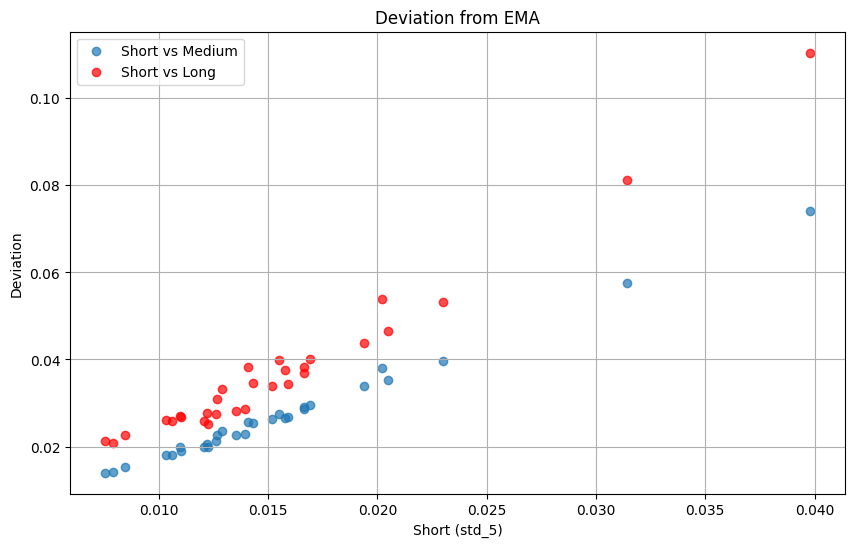

In [1]:
from random_test import prepare_data_for_runs_test, get_stats 
from helper import  calculate_ema
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from helper import plot_stock_data

dirname = "input/IAI"

results = []
short = []
medium = []
long = []
for root, dirs, files in os.walk(dirname):
    currDir = os.path.basename(root)
    for file in files:
        if file.endswith(".csv"):
            #print(file)
            fullpath = os.path.join(root, file)
        z, p_value,std_list = get_stats(fullpath)
        std_5, std_13, std_26 = std_list

        r = f" {file}, std_S:{std_5:.3f},std_M:{std_13:.3f},std_L:{std_26:.3f}" #  Z-statistic: {z}, p-value: {p_value}")
        results.append(r)
        short.append(std_5)
        medium.append(std_13)
        long.append(std_26)
#with open("output.csv", "w") as f:
#    for r in results:
#        f.write(r + "\n")

# Create visualization
plt.figure(figsize=(10, 6))

# Scatter plot: short vs medium
plt.scatter(short, medium, alpha=0.7, label='Short vs Medium')

# Scatter plot: short vs long
plt.scatter(short, long, alpha=0.7, label='Short vs Long', color='red')

plt.title('Deviation from EMA')
plt.xlabel('Short (std_5)')
plt.ylabel('Deviation')
plt.legend()
plt.grid(True)
plt.show()

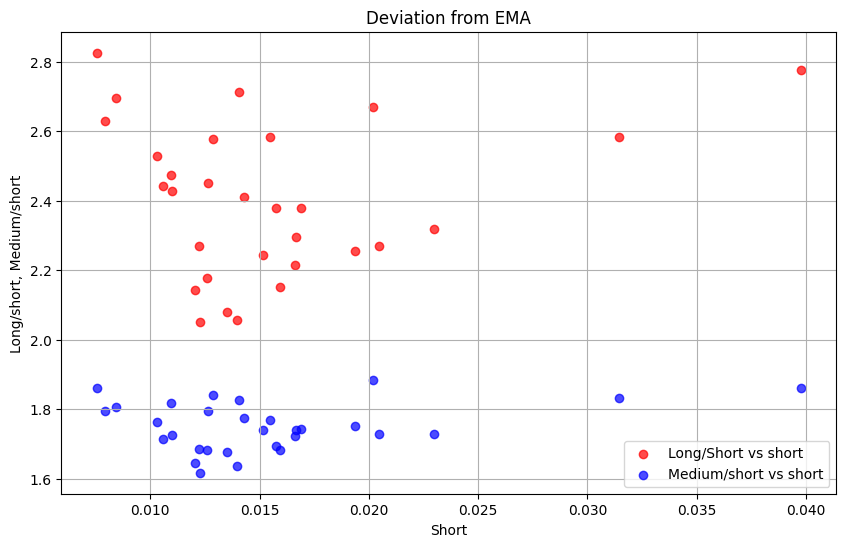

In [2]:
l2s = [l/s for l,s in zip(long, short)]
m2s = [m/s for m,s in zip(medium, short)]
# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter( short,l2s, alpha=0.7, label='Long/Short vs short', color='red')
plt.scatter( short,m2s, alpha=0.7, label='Medium/short vs short', color='blue')
plt.title('Deviation from EMA')
plt.xlabel('Short')
plt.ylabel('Long/short, Medium/short')
plt.legend()
plt.grid(True)
plt.show()


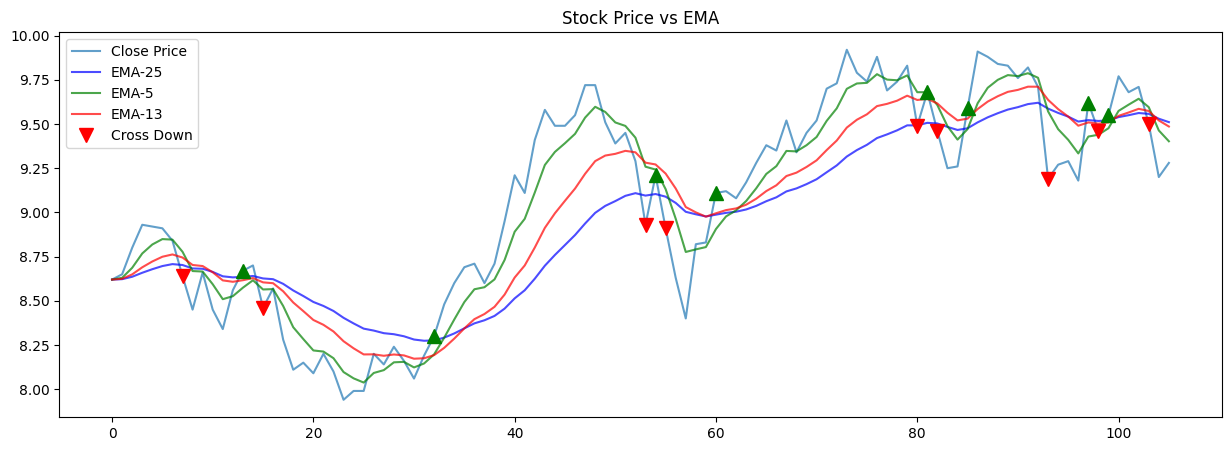

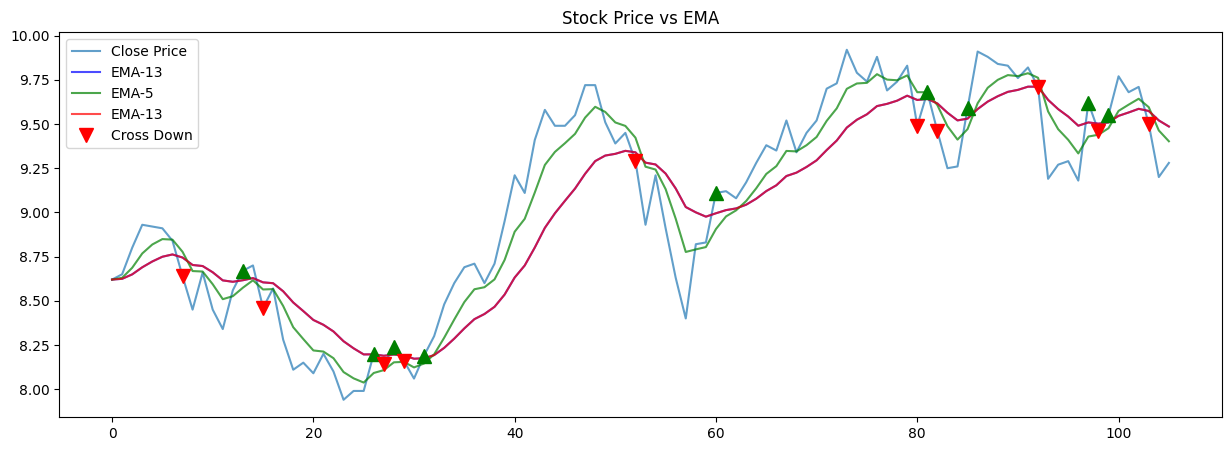

In [ ]:


from helper import get_crossing_points
#file = 'input/IAI/SF_last.csv'
file = 'input\IAI\BGC_last.csv'
#file = 'input\IAI\CME_last.csv'
#file = 'input\IAI\COIN_last.csv'
#file = 'input\IAI\DFIN_last.csv'
#file = 'input\IAI\EVR_last.csv'
#file = 'input\IAI\FDS_last.csv'

# Assuming stock_prices is a pandas DataFrame with a 'Close' column
stock_prices = pd.read_csv(file)
ema_period = 25  # for example
deviations = prepare_data_for_runs_test(stock_prices, ema_period)
cross_points = get_crossing_points(stock_prices, ema_period)
plot_stock_data(stock_prices, ema_period, deviations, cross_points, False)

ema_period = 13 
deviations = prepare_data_for_runs_test(stock_prices, ema_period)
cross_points = get_crossing_points(stock_prices, ema_period)
plot_stock_data(stock_prices, ema_period, deviations, cross_points, False)



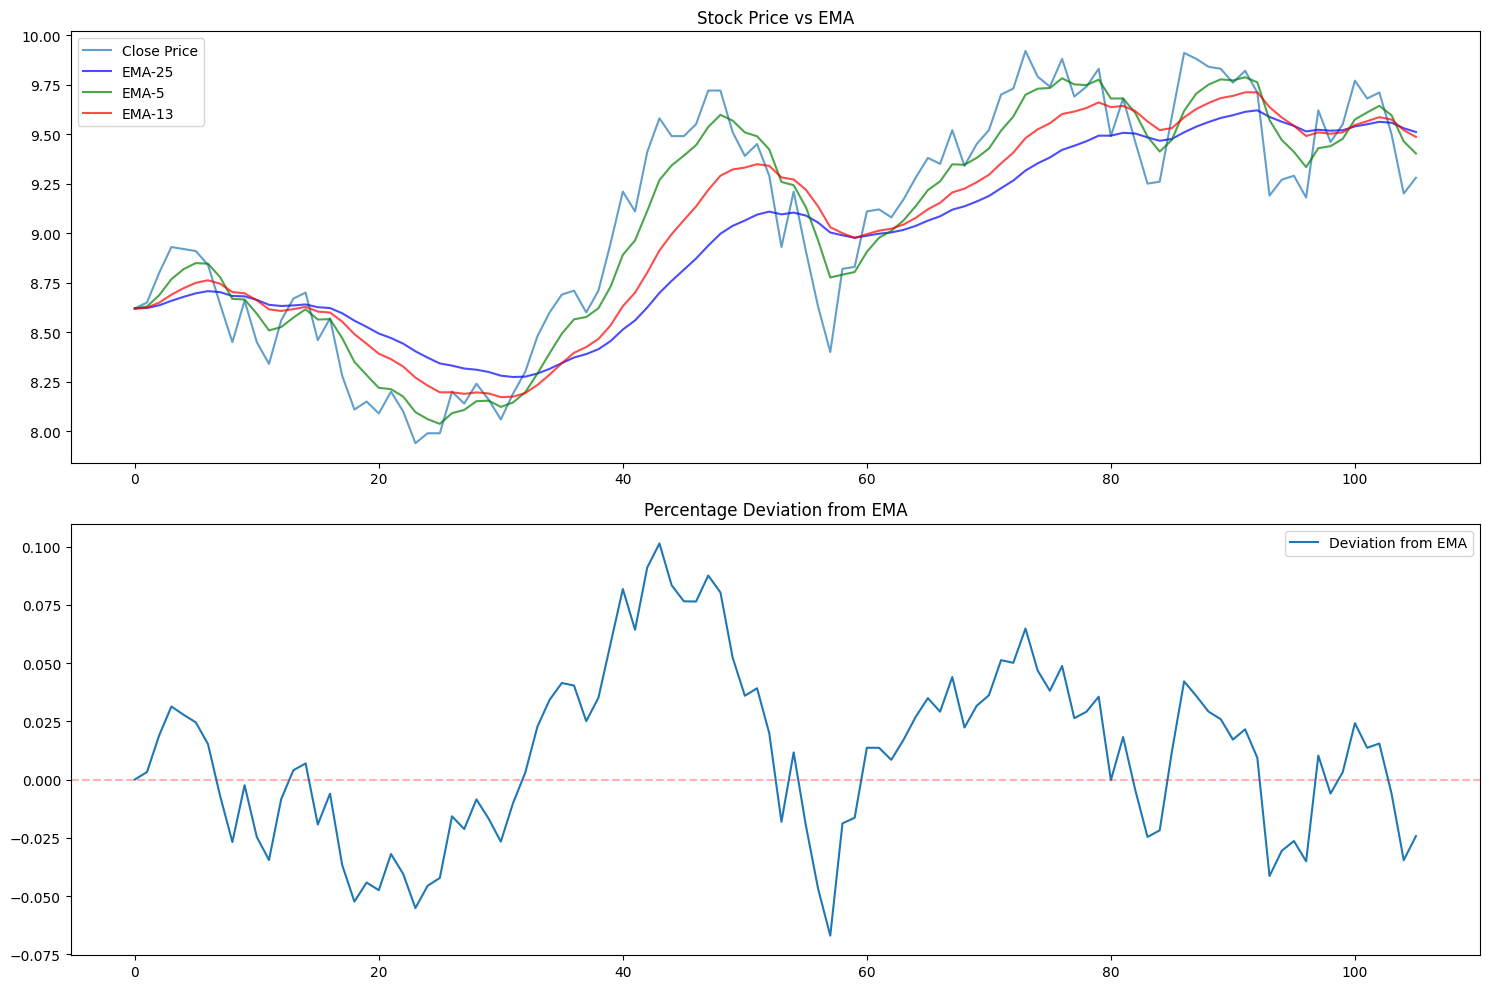

In [ ]:

#file = 'input/IAI/COIN_last.csv'

# Assuming stock_prices is a pandas DataFrame with a 'Close' column
stock_prices = pd.read_csv(file)
ema_period = 25  # for example
 
deviations = prepare_data_for_runs_test(stock_prices, ema_period)
plot_stock_data(stock_prices, ema_period, deviations)